In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Generating some random linearly spreaded data

In [8]:
X_train = np.linspace(-1, 1, 101)
y_train = 2*X_train + np.random.randn(*X_train.shape)*0.33

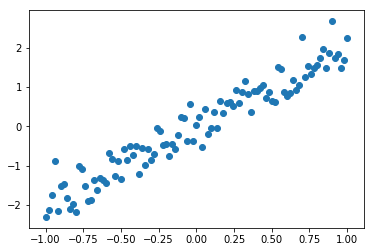

In [9]:
plt.scatter(X_train, y_train)

### Defining tensorflow model to run linear regression

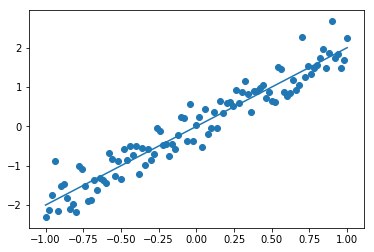

In [14]:
learning_rate = 0.01
training_epochs = 100

X = tf.placeholder("float")
Y = tf.placeholder("float")

# Defining our linear model: y = w*x
def model(X, w):
    return tf.multiply(X, w)

# Initializing weight
w = tf.Variable(0.0, name="weights")

# Declaring y_model variable
y_model = model(X, w)

# Declaring cost variable, squared error loss
cost = tf.square(Y - y_model)

# Optimizer initialized with learning rate
train_op = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Start a session
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Run the epochs
for epoch in range(training_epochs):
    for (x,y) in zip(X_train, y_train): # For each data point
        sess.run(train_op, feed_dict={X:x, Y:y}) # Run gradientdescent optimizer
        
# Extract the final w_val that is learned
w_pred = sess.run(w)

sess.close()
# Extract y_predicted
y_pred = X_train*w_val
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred)